# Step 1

In [1]:
import sqlite3

# Create a connection to the database file (it will create one if it doesn't exist)

In [2]:
conn = sqlite3.connect("sales_data.db")


In [3]:
cursor = conn.cursor()

# Create a 'sales' table

In [4]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales(
id INTEGER PRIMARY KEY AUTOINCREMENT ,
product TEXT ,
quantity INTEGER ,
price REAL
)
''')

# Insert sample data

In [5]:
sample_data = [ 
    ("Apple", 10, 20.0),
("Banana", 5, 5.0),
("Orange", 8, 15.0),
("Apple", 7, 20.0),
("Banana", 9, 5.0),
("Cherry", 6, 23.0),
("Watermelon", 3, 20.0),
("Orange", 20, 28.0),
("Cherry", 25, 18.0),
("Apple", 10, 30.0)
]

In [6]:
cursor.executemany('INSERT INTO sales(product, quantity, price) VALUES(?, ?, ?)', sample_data)

# Commit changes and close connection

In [7]:
conn.commit()


In [8]:
conn.close()

In [9]:
print("Step 1 Completed: Database & Table Created with Sample data")

Step 1 Completed: Database & Table Created with Sample data


# Step 2

In [10]:
import pandas as pd

In [11]:
# Connect to the database
conn = sqlite3.connect('sales_data.db')

# SQL query to calculate total quantity and revenue

In [12]:
query="""
SELECT product, SUM(quantity) AS total_qty,
SUM(quantity*price) AS revenue
FROM sales
GROUP BY product;
"""

# Execute query and load into pandas dataframe

In [13]:
df=pd.read_sql_query(query, conn)

# Print the result

In [14]:
print(df)

      product  total_qty  revenue
0       Apple        162   3840.0
1      Banana         84    420.0
2      Cherry        186   3528.0
3      Orange        168   4080.0
4  Watermelon         18    360.0


# Close the connection

In [15]:
conn.close()

# Step 3 Plot Bar Chart

In [16]:
import matplotlib.pyplot as plt

# Plot a bar chart for revenue by Product

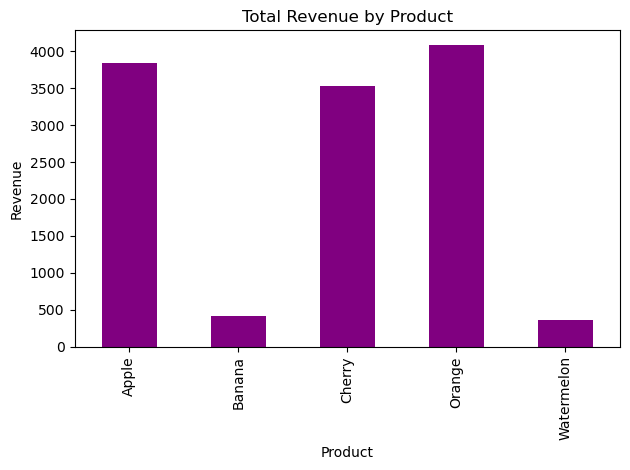

In [17]:
df.plot(kind='bar', x='product', y='revenue', color='purple', legend=False)

# Add Titles and labels
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")

#Show the chart
plt.tight_layout()
plt.show()